In [1]:
import pandas as pd
import os
from scipy.stats import ttest_ind
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

# eQTL

In [2]:
header=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/eQTL_catalogue/lead_pairs/split/header.tsv',sep='\t').columns

In [255]:
samples=header[(header.str.contains('beta')) + (header.str.contains('eqtl_id'))]

In [257]:
chr1=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/eQTL_catalogue/lead_pairs/split/chr1.tsv',sep='\t',header=None,names=header.tolist(),usecols=samples.tolist())

In [258]:
chr1

,eqtl_id,Alasoo_2018.macrophage_IFNg.beta,Alasoo_2018.macrophage_IFNg+Salmonella.beta,Alasoo_2018.macrophage_naive.beta,Alasoo_2018.macrophage_Salmonella.beta,BLUEPRINT_PE.T-cell.beta,BLUEPRINT_SE.monocyte.beta,BLUEPRINT_SE.neutrophil.beta,BrainSeq.brain.beta,FUSION.adipose_naive.beta,...,Schmiedel_2018.Th1_memory.beta,Schmiedel_2018.Th2_memory.beta,Schmiedel_2018.Treg_memory.beta,Schmiedel_2018.Treg_naive.beta,Schwartzentruber_2018.sensory_neuron.beta,TwinsUK.blood.beta,TwinsUK.fat.beta,TwinsUK.LCL.beta,TwinsUK.skin.beta,van_de_Bunt_2015.pancreatic_islet.beta
0,chr1_169796199_G_A.ENSG00000000457,0.014878,0.019929,0.007145,0.008409,-0.009101,-0.003149,0.012835,-0.064450,-0.124903,...,-0.053285,-0.064724,-0.051557,-0.012166,-0.004896,-0.102931,-0.101464,-0.078311,-0.172428,-0.056237
1,chr1_169845687_C_CTTCCA.ENSG00000000457,0.010908,-0.003541,0.007549,0.010561,-0.016851,-0.032392,0.011638,-0.059007,-0.112610,...,-0.061821,-0.067910,-0.071500,-0.049701,-0.003615,-0.037607,-0.049467,-0.055712,-0.085808,-0.053505
2,chr1_169821020_T_G.ENSG00000000457,0.032490,0.035531,-0.010889,0.005276,-0.024435,-0.002244,0.015308,-0.017674,-0.078033,...,-0.069205,-0.108168,-0.064846,-0.073328,0.047522,-0.057850,-0.044238,-0.064538,-0.098973,-0.026313
3,chr1_169982267_A_T.ENSG00000000457,-0.015936,-0.023199,-0.003959,-0.011975,0.006480,0.006495,0.001639,0.040951,0.102934,...,0.056723,0.029918,0.034181,0.002864,-0.017142,0.089044,0.070987,0.067175,0.133267,0.060757
4,chr1_169787407_G_C.ENSG00000000457,0.017091,0.040628,0.002270,-0.012849,-0.046222,-0.001068,0.026307,-0.033465,-0.096427,...,-0.067252,-0.077675,-0.066157,-0.090915,-0.013857,-0.074314,-0.068720,-0.062703,-0.106860,-0.052091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,chr1_208262975_T_G.ENSG00000286198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169476,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5142,chr1_208270332_C_A.ENSG00000286198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.481553,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5143,chr1_247323434_C_T.ENSG00000286216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.039183,NaN,...,NaN,NaN,NaN,0.222462,NaN,0.004210,0.006468,0.006864,-0.009389,-0.090711
5144,chr1_150320113_C_T.ENSG00000286219,-0.835799,-0.444700,-0.555345,-1.044910,-0.515010,-1.162060,-0.775167,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.105700,-0.384165,-0.620556,NaN,-1.014790,-0.640082


In [259]:
# target=chr1.columns[chr1.columns.str.contains('monocyte.beta')]
target=chr1.columns[chr1.columns.str.contains('monocyte')]
chr1['Target']=chr1[target].mean(axis=1)
target='Target'

# TPMs

In [260]:
os.chdir('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/eQTL_catalogue/tpms/tpm/')

In [261]:
tpms={}
for file in os.listdir():
    if file.endswith('_median_tpm.tsv'):
        exp=file.rstrip('_median_tpm.tsv')
        tpms[exp]=pd.read_csv(file,sep='\t')

In [262]:
genes=[]
for i in tpms:
    genes=genes+list(tpms[i]['phenotype_id'].unique())

In [263]:
merged=pd.DataFrame()
for i in tpms:
    table=tpms[i].pivot_table(values='median_tpm',columns=['study','qtl_group'],index='phenotype_id')
    if merged.empty: merged=table
    else:
        merged=merged.merge(table,left_index=True,right_index=True,how='outer')

In [264]:
merged

study           BLUEPRINT_PE   HipSci     GTEx                       \
qtl_group             T-cell     iPSC      LCL adipose_subcutaneous   
phenotype_id                                                          
ENSG00000000419      168.686  224.106  163.772              111.776   
ENSG00000000457       36.625    7.625   17.277               12.537   
ENSG00000000460        8.837   27.067   15.446                4.564   
ENSG00000000938        1.666    0.474  173.260               65.184   
ENSG00000000971        1.771    0.016    0.222              180.178   
...                      ...      ...      ...                  ...   
ENSG00000286266        0.000    0.000    2.122                0.000   
ENSG00000286269        0.000    0.000    0.000                0.000   
ENSG00000286270        0.000    0.000    0.000                0.000   
ENSG00000286271        0.905    0.085    0.278                0.440   
ENSG00000286272        0.000    0.000    0.000                0.000   

study                                                                        \
qtl_group       adipose_visceral adrenal_gland artery_aorta artery_coronary   
phenotype_id                                                                  
ENSG00000000419          114.238       151.027      110.898         106.522   
ENSG00000000457            9.638        12.616        8.237           9.487   
ENSG00000000460            3.246         2.998        2.749           3.096   
ENSG00000000938           59.219        20.729       16.019          31.762   
ENSG00000000971           81.223        51.793      165.800         374.025   
...                          ...           ...          ...             ...   
ENSG00000286266            0.000         0.000        0.000           0.000   
ENSG00000286269            0.000         0.000        0.000           0.000   
ENSG00000286270            0.000         0.000        0.000           0.000   
ENSG00000286271            0.255         0.191        0.140           0.288   
ENSG00000286272            0.000         0.000        0.000           0.000   

study                                   ...      Schmiedel_2018  \
qtl_group       artery_tibial    blood  ... monocyte_CD16_naive   
phenotype_id                            ...                       
ENSG00000000419       110.239   17.977  ...             134.002   
ENSG00000000457         9.520    3.411  ...              23.140   
ENSG00000000460         3.165    0.687  ...              17.086   
ENSG00000000938         9.144  748.385  ...            1987.121   
ENSG00000000971       294.033    0.358  ...               0.027   
...                       ...      ...  ...                 ...   
ENSG00000286266         0.000    0.000  ...               0.000   
ENSG00000286269         0.000    0.000  ...               0.000   
ENSG00000286270         0.000    0.000  ...               0.000   
ENSG00000286271         0.173    0.061  ...               0.000   
ENSG00000286272         0.000    0.000  ...               0.000   

study                                 FUSION                  Alasoo_2018  \
qtl_group       monocyte_naive adipose_naive muscle_naive macrophage_IFNg   
phenotype_id                                                                
ENSG00000000419         90.901       100.392       80.784         105.563   
ENSG00000000457          6.705        11.164        5.890          14.949   
ENSG00000000460          4.531         3.437        1.038           2.616   
ENSG00000000938       1553.818        45.761        3.876          31.412   
ENSG00000000971          0.210       120.803       14.348          83.252   
...                        ...           ...          ...             ...   
ENSG00000286266          0.000         0.000        0.000           0.000   
ENSG00000286269          0.000         0.000        0.011           0.000   
ENSG00000286270          0.000         0.000        0.000           0.000   
ENSG00000286271          0.000     

In [265]:
table=merged.groupby(level=1,axis=1).mean()

In [266]:
table=table[(table>100).any(axis=1)]

In [267]:
table

qtl_group,B-cell_naive,CD4_T-cell_anti-CD3-CD28,CD4_T-cell_naive,CD8_T-cell_anti-CD3-CD28,CD8_T-cell_naive,LCL,NK-cell_naive,T-cell,Tfh_memory,Th1-17_memory,...,skin,skin_not_sun_exposed,skin_sun_exposed,small_intestine,spleen,stomach,testis,thyroid,uterus,vagina
phenotype_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,149.058,247.810,156.373,240.985,137.430,165.00625,124.902,134.1230,129.115,166.599,...,99.062,97.559,95.092,103.814,104.117,99.939,152.917,124.013,129.334,103.121
ENSG00000000938,209.973,1.398,4.287,1.807,6.019,189.66225,1176.406,73.4675,5.568,0.294,...,15.784,11.185,12.148,27.220,368.788,10.828,8.361,26.865,30.602,19.265
ENSG00000000971,0.000,0.000,0.120,0.000,0.134,0.06225,2.272,1.0885,3.820,55.581,...,55.905,50.090,94.605,59.529,11.240,35.381,11.961,163.453,13.748,22.866
ENSG00000001036,14.679,3.805,15.484,3.208,10.914,42.89650,41.698,23.2520,19.603,21.640,...,42.308,24.002,28.012,71.661,56.614,62.511,24.000,71.818,59.471,50.062
ENSG00000001084,15.130,24.050,19.419,31.533,23.846,10.16300,44.200,21.9570,16.975,31.130,...,21.192,20.788,17.527,40.729,37.363,29.813,15.047,31.284,16.065,30.450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286076,0.000,0.000,0.000,0.000,0.000,0.00000,0.000,0.0000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.091,0.000,0.000,0.000,0.000,0.000
ENSG00000286169,0.208,0.211,0.233,0.375,0.288,40.77825,0.944,33.3320,0.179,0.170,...,16.145,6.131,6.553,3.516,12.202,1.415,9.696,2.760,2.271,4.396
ENSG00000286190,22.648,10.923,50.988,11.382,54.053,6.88700,41.543,39.2395,54.032,38.009,...,54.901,43.676,40.709,30.049,57.334,10.545,52.564,37.688,75.361,69.609


# Diff Exp gene detection

#### One Sample t Test

In [268]:
from scipy.stats import ttest_1samp

##### Each gene is tested for each tissue to check if DE from the rest

In [269]:
ttest_df={}
for tissue in table.columns:
    ttest={}
    for gene in table.index:
        ttest[gene]=ttest_1samp(table.loc[gene].drop(tissue),table[tissue][gene]).pvalue
    ttest_df[tissue]=ttest
ttest_df=pd.DataFrame(ttest_df)

##### Statistical threshold for t-Test to consider as DE

In [270]:
threshold = 0.001

In [271]:
ttest_binary=ttest_df < threshold

##### Count column is added to sort in ascending order and select most tissue-specific genes

In [272]:
ttest_binary['Count']=ttest_binary.sum(axis=1)

In [273]:
top_genes=[]
for tissue in ttest_binary.columns:
    top_genes=top_genes+ttest_binary.sort_values('Count')[tissue][ttest_binary[tissue] == True][:50].index.tolist()

In [274]:
print('Number of unique genes in set:',len(set(top_genes)))

Number of unique genes in set: 1864


##### Number of genes DE for each tissue

In [275]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ttest_binary.loc[top_genes].sum())

B-cell_naive                         296
CD4_T-cell_anti-CD3-CD28             318
CD4_T-cell_naive                     270
CD8_T-cell_anti-CD3-CD28             287
CD8_T-cell_naive                     272
LCL                                  337
NK-cell_naive                        289
T-cell                               447
Tfh_memory                           318
Th1-17_memory                        334
Th17_memory                          288
Th1_memory                           332
Th2_memory                           318
Treg_memory                          290
Treg_naive                           314
adipose_naive                        260
adipose_subcutaneous                 202
adipose_visceral                     197
adrenal_gland                        159
artery_aorta                         236
artery_coronary                      236
artery_tibial                        261
blood                                219
brain                                413
brain_amygdala  

## Matching names across datasets

In [276]:
table.columns[:10]

Index(['B-cell_naive', 'CD4_T-cell_anti-CD3-CD28', 'CD4_T-cell_naive',
       'CD8_T-cell_anti-CD3-CD28', 'CD8_T-cell_naive', 'LCL', 'NK-cell_naive',
       'T-cell', 'Tfh_memory', 'Th1-17_memory'],
      dtype='object', name='qtl_group')

In [277]:
chr1.columns[:10]

Index(['eqtl_id', 'Alasoo_2018.macrophage_IFNg.beta',
       'Alasoo_2018.macrophage_IFNg+Salmonella.beta',
       'Alasoo_2018.macrophage_naive.beta',
       'Alasoo_2018.macrophage_Salmonella.beta', 'BLUEPRINT_PE.T-cell.beta',
       'BLUEPRINT_SE.monocyte.beta', 'BLUEPRINT_SE.neutrophil.beta',
       'BrainSeq.brain.beta', 'FUSION.adipose_naive.beta'],
      dtype='object')

In [278]:
naming={}
for i in table.columns:
    if len(chr1.columns[chr1.columns.str.contains(i+'.beta')].tolist())>0:
        naming[i]=chr1.columns[chr1.columns.str.contains(i+'.beta')].tolist()

In [279]:
tpm_base=table[list(naming.keys())].loc[top_genes]

In [280]:
chr1_names=[j for i in list(naming.values()) for j in i]

In [281]:
eqtl_base=chr1[chr1_names]

## Weight calculation from tpm correlation

# TODO try removing close tissues (like T-Cell)

In [282]:
weights=tpm_base.corr()['monocyte'].drop('monocyte')

In [312]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(weights.sort_values())

qtl_group
testis                            -0.008585
brain_cerebellum                  -0.007605
brain_cerebellar_hemisphere       -0.007304
brain                             -0.005343
brain_naive                       -0.005005
brain_cortex                      -0.004607
heart_left_ventricle              -0.003927
brain_frontal_cortex              -0.003804
muscle                            -0.003615
muscle_naive                      -0.003549
brain_nucleus_accumbens           -0.003291
skin_sun_exposed                  -0.003214
brain_caudate                     -0.003183
pancreas                          -0.003130
skin_not_sun_exposed              -0.003021
CD8_T-cell_anti-CD3-CD28          -0.002819
brain_anterior_cingulate_cortex   -0.002762
heart_atrial_appendage            -0.002741
brain_putamen                     -0.002666
fat                               -0.002639
esophagus_mucosa                  -0.002447
vagina                            -0.002291
skin                  

## eQTL prediction

##### Weighting all eQTLs
- For each tissue the eQTL values are multiplied by the weights.
- To avoid NAs reducing the final value, a max possible value is calculated
multiplying "notna" (True = 1) by the weights and the final score is relative to the max possible value of the weights.
#### TODO: For genes with only eQTL data from a low weighted tissue, the relative scoring would make that value the 100% of the prediction, even if that tissue is a poor predictor.

In [284]:
weighted_eqtls={}
max_weight={}
for i in naming.keys():
    if i == 'monocyte':
        continue
    weighted_eqtls[i]=eqtl_base[naming[i]].mean(axis=1)*weights[i]
    max_weight[i]=eqtl_base[naming[i]].mean(axis=1).notna()*weights[i]

In [285]:
prediction=pd.DataFrame(weighted_eqtls).sum(axis=1)/pd.DataFrame(max_weight).sum(axis=1)

In [305]:
# pred_real=pd.DataFrame({'Prediction':prediction,'Real':chr1['BLUEPRINT_SE.monocyte.beta']}).dropna()
pred_real=pd.DataFrame({'eqtl_id':chr1['eqtl_id'],'Weighted Means Prediction':prediction,'Real':chr1['Target']}).dropna()

In [306]:
pred_real.to_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/weigthed_mean_output.csv',index=False)

#### Pearson Correlation

In [287]:
pred_real.corr()['Prediction']['Real'].round(3)

0.93

#### RMSE

In [288]:
np.sqrt(mean_squared_error(pred_real['Prediction'],pred_real['Real'])).round(3)

0.136

# TEST TO AVOID POOR SCORES

# Question: Is it worth it?

In [289]:
eqtl_base

,Schmiedel_2018.B-cell_naive.beta,Schmiedel_2018.CD4_T-cell_anti-CD3-CD28.beta,Schmiedel_2018.CD4_T-cell_naive.beta,Schmiedel_2018.CD8_T-cell_anti-CD3-CD28.beta,Schmiedel_2018.CD8_T-cell_naive.beta,GENCORD.LCL.beta,GEUVADIS.LCL.beta,GTEx.LCL.beta,TwinsUK.LCL.beta,Schmiedel_2018.NK-cell_naive.beta,...,TwinsUK.skin.beta,GTEx.skin_not_sun_exposed.beta,GTEx.skin_sun_exposed.beta,GTEx.small_intestine.beta,GTEx.spleen.beta,GTEx.stomach.beta,GTEx.testis.beta,GTEx.thyroid.beta,GTEx.uterus.beta,GTEx.vagina.beta
0,0.028679,-0.005807,-0.072088,-0.045306,-0.037681,-0.046916,-0.063590,-0.062161,-0.078311,-0.063585,...,-0.172428,-0.061520,-0.043046,-0.059075,-0.082796,-0.036685,-0.020776,-0.043283,-0.056050,-0.016162
1,0.031911,-0.033291,-0.084760,-0.045798,-0.087744,-0.040343,-0.067471,-0.095245,-0.055712,-0.053426,...,-0.085808,-0.072841,-0.032812,-0.072209,-0.060617,-0.046864,-0.036004,-0.042159,-0.012331,-0.020024
2,-0.009466,-0.010877,-0.069342,-0.010378,-0.047494,-0.038817,-0.061410,-0.063053,-0.064538,-0.077746,...,-0.098973,-0.057289,-0.018031,-0.040397,-0.072543,-0.036856,-0.028175,-0.030315,-0.061687,-0.029263
3,-0.046093,0.027643,0.025325,0.054790,-0.001487,0.074606,0.050293,0.021695,0.067175,0.039364,...,0.133267,0.062336,0.033675,0.054271,0.022257,0.024690,0.043190,0.039241,0.029175,0.017453
4,0.017813,-0.024561,-0.095401,-0.036921,-0.058677,-0.052326,-0.068788,-0.053797,-0.062703,-0.038827,...,-0.106860,-0.036977,-0.016105,-0.034219,-0.082034,-0.044997,-0.013007,-0.038698,-0.068499,-0.015108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5143,0.145227,-0.162651,-0.126960,-0.386428,-1.142780,-0.028301,0.081355,0.054696,0.006864,NaN,...,-0.009389,-0.093995,0.067389,0.067075,-0.143777,0.056337,-0.093953,0.012284,0.089884,-0.060011
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.014790,-0.543598,-0.523959,NaN,-0.225970,-0.938518,-0.373415,-0.670974,-0.459346,-0.814897


In [290]:
eqtl_base.notna().sum(axis=1).describe()

count    5146.000000
mean       67.340459
std        27.994570
min         1.000000
25%        50.000000
50%        78.000000
75%        93.000000
max        93.000000
dtype: float64

In [291]:
pd.DataFrame(weighted_eqtls).sum(axis=1)

0      -0.044225
1      -0.082400
2      -0.087297
3       0.026306
4      -0.082153
          ...   
5141   -0.005782
5142    0.014873
5143   -0.092383
5144   -2.913721
5145   -0.735199
Length: 5146, dtype: float64

In [292]:
pd.DataFrame(max_weight).sum(axis=1) > pd.DataFrame(max_weight).sum(axis=1).max()/2

0        True
1        True
2        True
3        True
4        True
        ...  
5141    False
5142    False
5143     True
5144     True
5145     True
Length: 5146, dtype: bool

In [293]:
alt_prediction=pd.DataFrame({'Prediction':prediction,'Real':chr1['Target']})[pd.DataFrame(max_weight).sum(axis=1) > pd.DataFrame(max_weight).sum(axis=1).max()/1.1].dropna()

In [294]:
len(alt_prediction)

2121

In [295]:
alt_prediction.corr()['Prediction']['Real'].round(3)

0.952

In [296]:
np.sqrt(mean_squared_error(alt_prediction['Prediction'],alt_prediction['Real'])).round(3)

0.064

# PLOT

In [297]:
from plotnine import *

In [298]:
def real_pred_plot(y_test,y_pred):
    plot=((
        ggplot(pd.DataFrame({'y_test':y_test,'y_pred':y_pred}),aes(x='y_test',y='y_pred'))+
            geom_point()+
            geom_smooth(colour='red')
    ))
    return(plot)

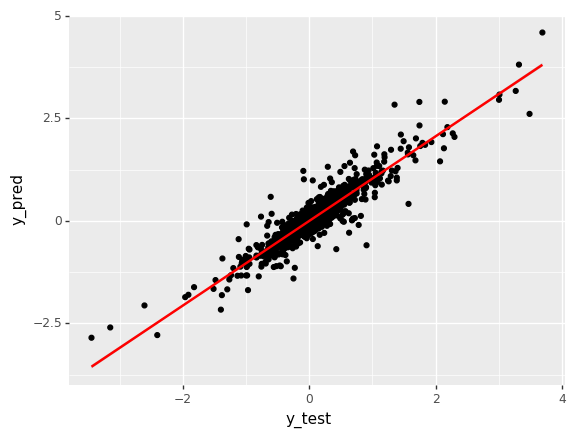

<ggplot: (2966345506813)>

In [299]:
real_pred_plot(pred_real['Prediction'],pred_real['Real'])

#### Alt prediction plot

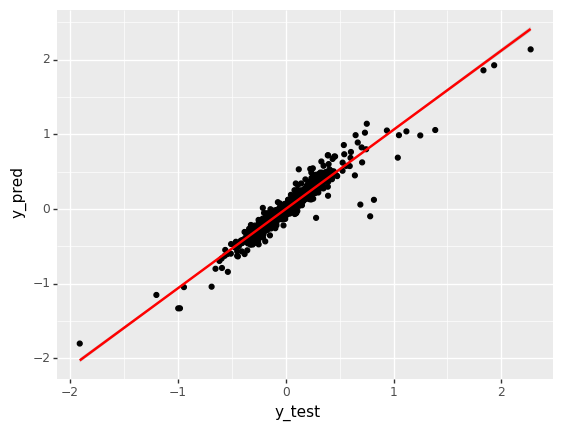

<ggplot: (2966345468624)>

In [300]:
real_pred_plot(alt_prediction['Prediction'],alt_prediction['Real'])